<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with Keras

_Authors: Justin Pounders (ATL) and Riley Dallas (ATX)_

---


### Learning Objectives

- Describe the basic `keras` workflow.
- Train regression and classification neural networks using `keras`

In [1]:
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


# Regression
---

`make_regression` is an excellent library for generating a random regression problem. This helps us focus on the model without having to worry about the dataset. 

In the cell below, use `make_regression` to generate 10,000 samples using 20 features.

In [2]:
X, y = make_regression(n_samples = 10000, n_features = 20, random_state = 42)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [4]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

### Your first Neural Network!!
---

Next stop, [The Singularity](https://en.wikipedia.org/wiki/Technological_singularity)!

Creating a model in `keras` entails a few steps:
1. Create your network topology
2. Compile your model
3. Fit your model

We'll cover each step in the cells below.

### Create your network topology
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

For *all* regression problems, your output layer will be 1 neuron with *no* activation function. 

In [5]:
model = Sequential()
model.add(Dense(32,                  #32 neurons in the middle/hidden layer
               input_shape=(20,),    #20 features, as we earlier specified. Only need this argument, 
                                     #for 1st hidden layer. Future hidden layers dont need to specify.
               activation = 'relu')) #relu better than sigmoid, tanh
model.add(Dense(1))                  #1 neuron in output. Notice we dont specify input_shape here, cos
                                     #it uses 32 from previous

This is considered a 2 layer neural network, cos we dont consider input layer as a layer.

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What [loss function](https://keras.io/losses/) to use (depends on if it's regression, classification, etc)
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [6]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [17]:
model.fit(X_train_ss, y_train, validation_data=(X_test_ss, y_test), epochs=10, batch_size=512,use_multiprocessing=True)

# cos batch_size is 1<x<7500 here, its minibatch. But if we set batch_size=1, then its stochastic. 
# If batch_size=7500, then its batch

# MUUUUUST keep batch_size as a power of 2!!!

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 0s 3us/step - loss: 2150.1026 - mae: 32.9739 - val_loss: 2052.8284 - val_mae: 32.1421
Epoch 2/10
7500/7500 [==============================] - 0s 5us/step - loss: 2054.6417 - mae: 32.2073 - val_loss: 1964.3838 - val_mae: 31.4419
Epoch 3/10
7500/7500 [==============================] - 0s 4us/step - loss: 1966.9243 - mae: 31.4976 - val_loss: 1879.1371 - val_mae: 30.7598
Epoch 4/10
7500/7500 [==============================] - 0s 4us/step - loss: 1882.5072 - mae: 30.8017 - val_loss: 1799.9755 - val_mae: 30.1162
Epoch 5/10
7500/7500 [==============================] - 0s 4us/step - loss: 1803.0142 - mae: 30.1508 - val_loss: 1725.5962 - val_mae: 29.5019
Epoch 6/10
7500/7500 [==============================] - 0s 4us/step - loss: 1729.0292 - mae: 29.5291 - val_loss: 1654.5646 - val_mae: 28.9030
Epoch 7/10
7500/7500 [==============================] - 0s 4us/step - loss: 1658.2546 - mae: 28.9437

Above we can see the loss (mse) and metric (mae), for both the trg set, and the validation (or test) set.

### Model predictions
---

Your `keras` model has a `.fit()` method, similar to `sklearn`. The only difference is `keras` returns a 2D `numpy` matrix (`sklearn` returns a 1D `numpy` array).

Try it out in the cell below.

In [18]:
model.predict(X_test_ss)

array([[  90.73385],
       [ 116.07323],
       [ 274.26654],
       ...,
       [ 184.75266],
       [ 172.4649 ],
       [-250.3132 ]], dtype=float32)

# Binary Classification
---

`make_classification` is similar to `make_regression`, except now we're predicting a class (0 or 1).

In the cell below, use `make_classification` to generate 10,000 samples using 20 features.

In [19]:
X, y = make_classification(n_samples=10000, n_features=20, random_state=42)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [25]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

### Network Topology for Binary Classification
---

We'll create a simple network with:
- an input layer, 
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

For *all* binary classification problems, your output layer will be 1 neuron with `'sigmoid'` activation function. Sigmoid squashes the output of our neuron to a value between 0 and 1, which is great for predicting probabilities. We'll use the probability for our loss function in the next step.

In [54]:
model = Sequential()
model.add(Dense(32,
                input_shape=(20,),      #20 features, as we earlier specified
                activation='relu'))
model.add(Dense(1,                      #binary classification here, hence just 2 outputs
                activation='sigmoid'))

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For binary classification, use `binary_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy']) #metric can also be 'accuracy'

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

When you fit a model, `keras` returns a `History` object. We need that in the next step, but for now, just save it to a variable.

In [56]:
history = model.fit(X_train_ss, y_train, validation_data=(X_test_ss,y_test),epochs=10, batch_size=512)

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 0s 18us/step - loss: 0.7506 - binary_accuracy: 0.5429 - val_loss: 0.6910 - val_binary_accuracy: 0.5764
Epoch 2/10
7500/7500 [==============================] - 0s 3us/step - loss: 0.6679 - binary_accuracy: 0.6039 - val_loss: 0.6251 - val_binary_accuracy: 0.6640
Epoch 3/10
7500/7500 [==============================] - 0s 4us/step - loss: 0.6066 - binary_accuracy: 0.6919 - val_loss: 0.5765 - val_binary_accuracy: 0.7480
Epoch 4/10
7500/7500 [==============================] - 0s 5us/step - loss: 0.5604 - binary_accuracy: 0.7699 - val_loss: 0.5381 - val_binary_accuracy: 0.8028
Epoch 5/10
7500/7500 [==============================] - 0s 4us/step - loss: 0.5226 - binary_accuracy: 0.8189 - val_loss: 0.5057 - val_binary_accuracy: 0.8368
Epoch 6/10
7500/7500 [==============================] - 0s 5us/step - loss: 0.4905 - binary_accuracy: 0.8503 - val_loss: 0.4769 - val_binary_accuracy: 0.8532
Epo

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

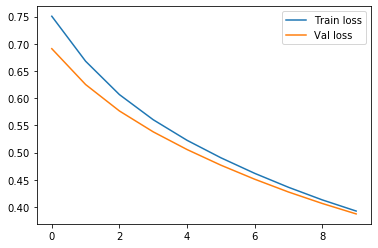

In [58]:
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Val loss')
plt.legend();

If val loss (its on test data) is going further up, but training loss is decreasing, it means overfitting, duh.

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

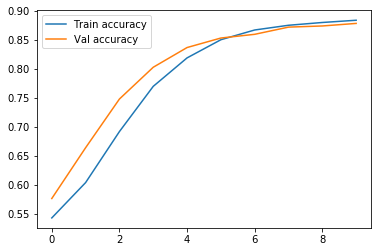

In [67]:
plt.plot(history.history['binary_accuracy'],label='Train accuracy')
plt.plot(history.history['val_binary_accuracy'],label='Val accuracy')
plt.legend();

Here obviously higher accuracy is better.

# Multi-class Classification
---

The `make_classification` function allows for multi-class problems as well. Simply increase the `n_classes` and voila!

**NOTE**: You'll need to increase `n_informative` as you increase `n_classes`.

In the cell below, let's create a dataset with three classes.

In [84]:
classes=3
X, y = make_classification(n_samples=10000, n_features=20,random_state=42,n_classes=classes, n_informative=classes+1)
# n_informative should generally be n_classes+1

In [78]:
y[:50]

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 0,
       2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1])

### One-hot Encoding Targets
---

In `keras`, you have to one-hot encode your `y` if it contains more than two classes. We'll use `keras`' built-in `to_categorical` function to achieve this.

In [79]:
y = to_categorical(y, num_classes=classes)
y[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

### Train/Test Split
---

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

### `StandardScaler`
---

Use an instance of `StandardScaler` to scale your `X_train` and `X_test` in the cell below.

In [81]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

### Network Topology for Multi-class Classification
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer

For *all* multi-class classification problems, your output layer will be the same number of neurons as the number of classes in your problem. The activation function will be `softmax`, which will normalize the predictions into probabilities that sum up to 1.0.

In [96]:
model = Sequential()
model.add(Dense(32,
               input_shape=(20,),
               activation='relu'))
model.add(Dense(3,activation='softmax'))  #for softmax, output layer GOTTA have same number of neurons, as n_classes!

### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For multi-class classification, use `categorical_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [97]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [98]:
history = model.fit(X_train_ss, y_train, validation_data = (X_test_ss, y_test), batch_size = 512, epochs=10)

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 0s 28us/step - loss: 1.2468 - categorical_accuracy: 0.3333 - val_loss: 1.1773 - val_categorical_accuracy: 0.3560
Epoch 2/10
7500/7500 [==============================] - 0s 3us/step - loss: 1.1242 - categorical_accuracy: 0.3877 - val_loss: 1.0754 - val_categorical_accuracy: 0.4248
Epoch 3/10
7500/7500 [==============================] - 0s 4us/step - loss: 1.0401 - categorical_accuracy: 0.4580 - val_loss: 1.0038 - val_categorical_accuracy: 0.4900
Epoch 4/10
7500/7500 [==============================] - 0s 4us/step - loss: 0.9788 - categorical_accuracy: 0.5196 - val_loss: 0.9498 - val_categorical_accuracy: 0.5612
Epoch 5/10
7500/7500 [==============================] - 0s 4us/step - loss: 0.9303 - categorical_accuracy: 0.5761 - val_loss: 0.9060 - val_categorical_accuracy: 0.6068
Epoch 6/10
7500/7500 [==============================] - 0s 4us/step - loss: 0.8895 - categorical_accuracy: 0.61

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

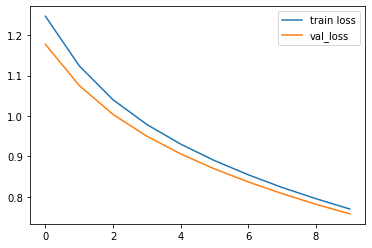

In [99]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend();

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

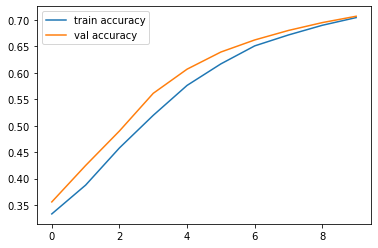

In [101]:
plt.plot(history.history['categorical_accuracy'],label='train accuracy')
plt.plot(history.history['val_categorical_accuracy'],label='val accuracy')
plt.legend();